In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=15,10

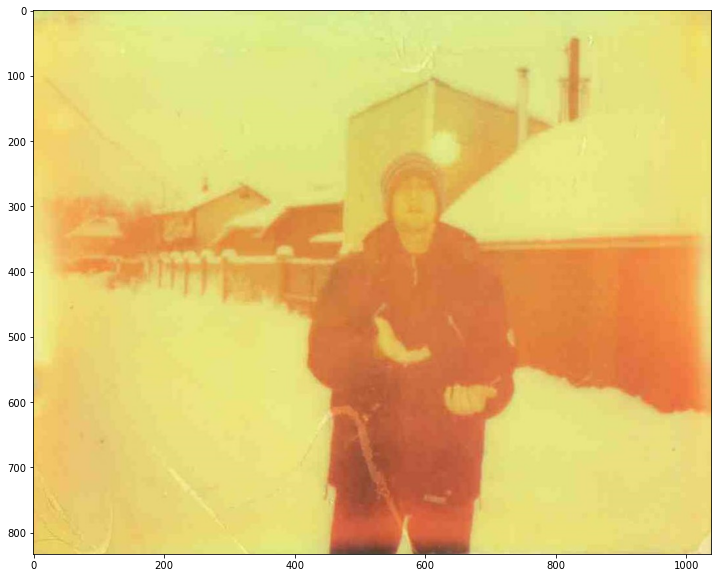

In [10]:
img = cv2.imread('muz.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fd624c4ce20>)

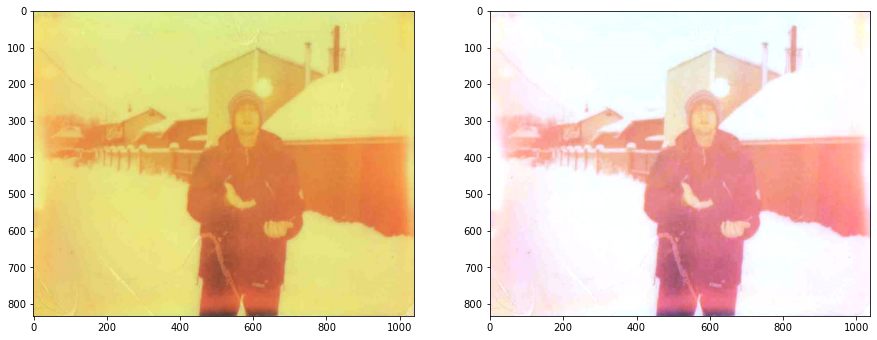

In [4]:
# WHITE BALANCE
# Define white patch and the coefficients
row, col = 300, 1000
white = img[row, col,:]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced_white = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced_white[..., channel] = img[..., channel] * coeffs[channel]
#print(img)
#print(white)
# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced_white = balanced_white/255
balanced_white[balanced_white > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced_white)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fd624374a90>)

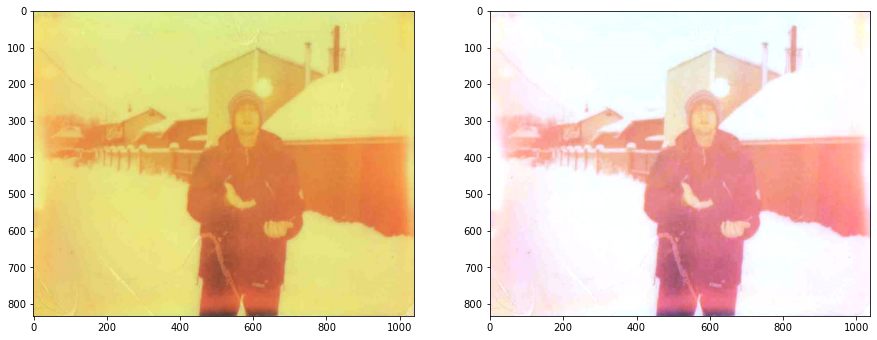

In [5]:
#GRAY WORLD

mean_r = np.average(img[:,:,0])
mean_g = np.average(img[:,:,1])
mean_b = np.average(img[:,:,2])

#print(mean_r)
#print(mean_g)
#print(mean_b)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

kr = 1
kg = mean_r/mean_g
kb = mean_r/mean_b

#print(kr)
#print(kg)
#print(kb)

# Apply color balancing and generate the balanced image


coeffs = (kr, kg, kb)

balanced_gray = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced_gray[..., channel] = img[..., channel] * coeffs[channel]
    
balanced_gray = balanced_gray/255
balanced_gray[balanced_gray > 1] = 1

# Show the original and the balanced image side by side


plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced_white)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fd61c662a30>)

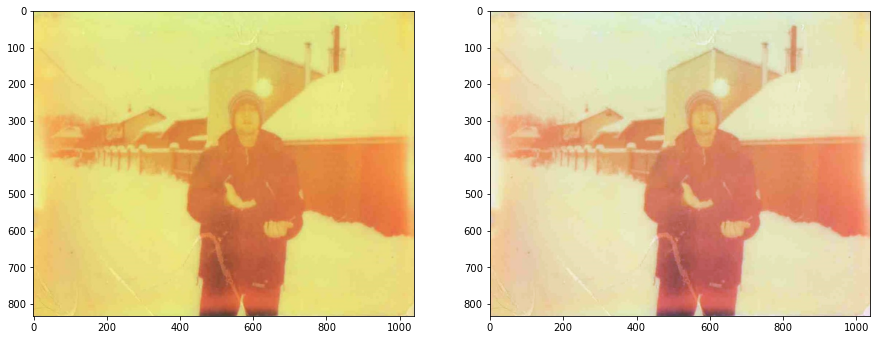

In [6]:
#SCALE BY MAX 

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.nanmax(img[:,:,0])
max_g = np.nanmax(img[:,:,1])
max_b = np.nanmax(img[:,:,2])

scale_r = 255/max_r
scale_g = 255/max_g
scale_b = 255/max_b

# Apply scale-by-max balancing and generate the balanced image
coeffs = (scale_r, scale_g, scale_b)

balanced_scbm = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced_scbm[..., channel] = img[..., channel] * coeffs[channel]
    
balanced_scbm = balanced_scbm/255
balanced_scbm[balanced_scbm > 1] = 1

# Show the original and the balanced image side by side


plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced_scbm)


(-0.5, 2077.5, 1665.5, -0.5)

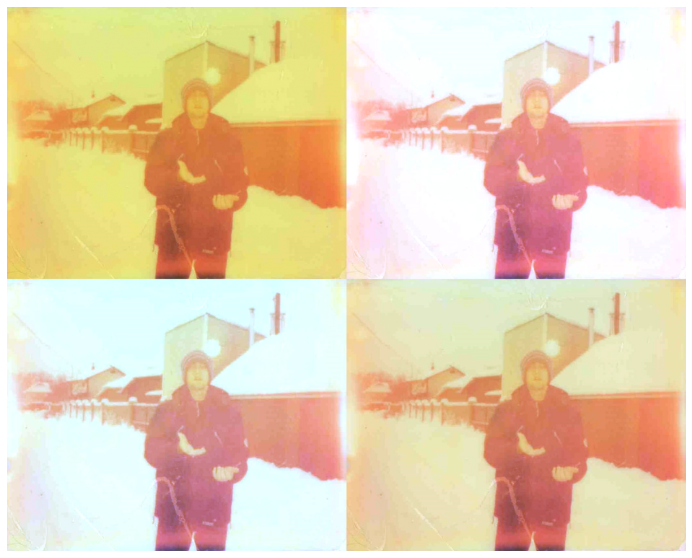

In [12]:
img = img/255
img[img>1] = 1

out1 = np.hstack([img, balanced_white])
out2 = np.hstack([balanced_gray, balanced_scbm])
out = np.vstack([out1, out2])

plt.imshow(out)
plt.axis(False)